In [6]:
! kaggle datasets download ahmedhamada0/brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection
License(s): copyright-authors
brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-detection.zip', 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

In [3]:
yes_tumor_images='/content/yes'
no_tumor_images='/content/no'

In [16]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#!pip install scikit-learn
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import normalize
import pandas as pd
import numpy as np

In [5]:
print('''
Total number of images in yes_tumor_images folder''',len(os.listdir(yes_tumor_images)),
'''\nTotal number of images in validation folder''',len(os.listdir(no_tumor_images)))


Total number of images in yes_tumor_images folder 1500 
Total number of images in validation folder 1500


In [6]:
image_path_yes=[]
label_yes=[]
for i in os.listdir(yes_tumor_images):
  image_path_yes.append(os.path.join(yes_tumor_images,i))
  label_yes.append(i[0:len(i)-4])


In [7]:
image_path_no=[]
label_no=[]
for i in os.listdir(no_tumor_images):
  image_path_no.append(os.path.join(no_tumor_images,i))
  label_no.append(i[0:len(i)-4])

In [8]:
f=pd.DataFrame({'Image_path':image_path_yes,'Image_label':label_yes})


In [9]:
d=pd.DataFrame({'Image_path':image_path_no,'Image_label':label_no})

In [10]:
df=pd.concat([f,d],axis=0)

In [11]:
df.shape

(3000, 2)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le=LabelEncoder()
y=le.fit_transform(df['Image_label'])

oe=OneHotEncoder()
y=oe.fit_transform(y.reshape(-1,1)).toarray()

In [13]:
df['Image_label']

,Image_label
0,y117
1,y1440
2,y1294
3,y201
4,y1200
...,...
1495,no559
1496,no782
1497,no595
1498,no1112


In [14]:
x_train,x_test,y_train,y_test=train_test_split(df['Image_path'],df['Image_label'],test_size=0.2,random_state=42)

In [15]:
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((2400,), (600,), (2400,), (600,))

array([[[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [11, 11, 11]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [ 9,  9,  9],
        [13, 13, 13],
        [15, 15, 15]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [ 8,  8,  8],
        [14, 14, 14],
        [ 3,  3,  3]],

       ...,

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [15, 15, 15]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [13, 13, 13],
        [14, 14, 14],
        [15, 15, 15]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 5,  5,  5]]], dtype=uint8)
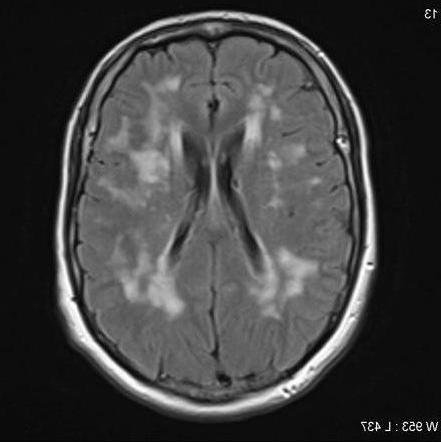

In [16]:
cv2.imread(os.path.join(yes_tumor_images,x_train[45]))

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)
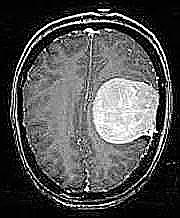

In [17]:
cv2.imread(os.path.join(no_tumor_images,x_train[9]))

In [18]:
x_train_image = []

for path in x_train:
    img = cv2.imread(path)
    if img is not None:
        resized_img = cv2.resize(img, (180, 180))
        x_train_image.append(resized_img)
    else:
        print(f"Image not found: {path}")

In [19]:
x_test_image = []

for path in x_test:
    img = cv2.imread(path)
    if img is not None:
        resized_img = cv2.resize(img, (180, 180))
        x_test_image.append(resized_img)
    else:
        print(f"Image not found: {path}")

In [20]:
x_train_image=np.array(x_train_image)
x_test_image=np.array(x_test_image)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
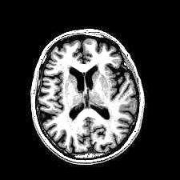

In [21]:
x_train_image[2299]

In [22]:
y_train_label=np.array(y_train['Image_label'])
y_test_label=np.array(y_test)

KeyError: 'Image_label'

In [ ]:
np.array(y_train['Image_label'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
model=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

In [10]:
model.flow_from_directory(
    '/content/yes',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
)

Found 0 images belonging to 0 classes.


In [11]:
yes_path='/content/yes'
no_path='/content/no'

In [12]:
yes_image_paths=[]
no_image_paths=[]
yes_label=[]
no_label=[]

In [17]:
for i in os.listdir(yes_path):
  yes_image_paths.append(os.path.join(yes_path,i))
  yes_label.append(1)
for i in os.listdir(no_path):
  no_image_paths.append(os.path.join(no_path,i))
  no_label.append(0)





In [61]:
yes_df=pd.DataFrame({'Image_path':yes_image_paths,'Image_label':yes_label})

In [62]:
no_df=pd.DataFrame({'Image_path':no_image_paths,'Image_label':no_label})

In [64]:
df=pd.concat([yes_df,no_df],axis=0)

In [65]:
x_train,x_test,y_train,y_test = train_test_split (df['Image_path'],df['Image_label'],test_size=0.2,random_state=42)

In [66]:
x_train

,Image_path
642,/content/yes/y1346.jpg
700,/content/yes/y95.jpg
226,/content/yes/y469.jpg
197,/content/no/no989.jpg
1010,/content/yes/y250.jpg
...,...
138,/content/no/no895.jpg
1095,/content/yes/y770.jpg
1130,/content/yes/y209.jpg
1294,/content/yes/y1180.jpg


In [67]:
x_train_image=[]
for i in x_train:
  img=cv2.imread(i)
  if img is not None:
    resized_img=cv2.resize(img,(180,180))
    x_train_image.append(resized_img)

In [68]:
x_test_image=[]
for i in x_test:
  img=cv2.imread(i)
  if img is not None:
    resized_img=cv2.resize(img,(180,180))
    x_test_image.append(resized_img)

In [69]:
x_train_image=np.array(x_train_image)
x_test_image=np.array(x_test_image)

In [70]:
x_train_label=np.array(y_train).reshape(-1,1)
x_test_label=np.array(y_test).reshape(-1,1)

In [71]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [72]:
model=keras.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,105 (25.36 MB)

 Trainable params: 6,647,105 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
model.fit(x_train_image,x_train_label,epochs=1,validation_data=(x_test_image,x_test_label))

75/75 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.7135 - loss: 16.9486 - val_accuracy: 0.8500 - val_loss: 0.3196


In [76]:
model.evaluate(x_test_image,x_test_label)

19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 702ms/step - accuracy: 0.8616 - loss: 0.3148


[0.3196370601654053, 0.8500000238418579]

In [90]:
path_to_image='/content/yes/y1122.jpg'

In [91]:
image=cv2.imread(path_to_image)

In [92]:
image=cv2.resize(image,(180,180))

In [93]:
np.where(model.predict(image.reshape(1,180,180,3)) > 0.5 ,1,0 )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[1]])

In [94]:
model.save('brain_tumor_detection.h5')

In [95]:
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [96]:
import gradio

In [97]:
def brain_tumor_detection(image):
  image=cv2.resize(image,(180,180))
  image=image.reshape(1,180,180,3)
  prediction=model.predict(image)
  return str(np.where(prediction > 0.5 ,'Brain_Tumor','No_Brain_Tumor' )[0][0])


In [ ]:
gradio.Interface(brain_tumor_detection,gradio.Image(),'text').launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bcfb5d9cba52515c32.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━